## Importing libraries

In [16]:
!pip uninstall numpy
!pip install numpy=1.3

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Would remove:
    /Volumes/T7/major-project/myenv/bin/f2py
    /Volumes/T7/major-project/myenv/bin/numpy-config
    /Volumes/T7/major-project/myenv/lib/python3.13/site-packages/numpy-2.2.6.dist-info/*
    /Volumes/T7/major-project/myenv/lib/python3.13/site-packages/numpy/*
Proceed (Y/n)? ^C

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
ERROR: Invalid requirement: 'numpy=1.3': Expected end or semicolon (after name and no valid version specifier)
    numpy=1.3
         ^
Hint: = is not a valid operator. Did you mean == ?


In [111]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [112]:
model = tf.keras.models.load_model('new_trained_model.h5')

In [113]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │        42,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,827,754 (29.86 MB)

 Trainable params: 7,827,752 (29.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Visualizing single image of test set

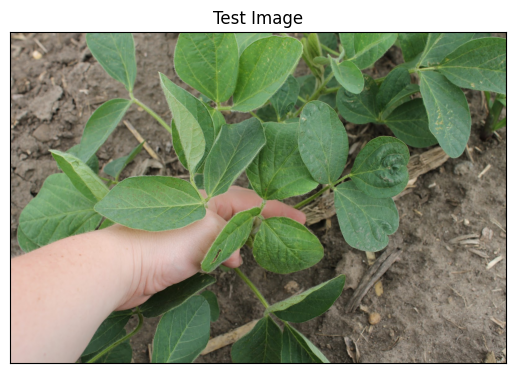

In [127]:
import cv2
image_path = "../testing/6.15.12+Soybeans+V3.JPG.jpg"

# Reading image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Displaying image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()


## Testing the model

In [128]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # To convert a single image to a batch
print(input_arr)

[[[[155. 145. 133.]
   [129. 117. 103.]
   [175. 149. 124.]
   ...
   [128. 121. 105.]
   [106.  99.  81.]
   [103. 100.  81.]]

  [[150. 130. 106.]
   [184. 164. 139.]
   [197. 175. 151.]
   ...
   [111. 105.  89.]
   [ 98.  96.  81.]
   [103.  98.  79.]]

  [[113. 105.  86.]
   [156. 144. 122.]
   [182. 172. 145.]
   ...
   [ 66. 113.  43.]
   [ 65. 108.  39.]
   [130. 153. 109.]]

  ...

  [[221. 193. 189.]
   [221. 193. 189.]
   [218. 193. 188.]
   ...
   [147. 129. 117.]
   [113. 103.  94.]
   [131. 125. 111.]]

  [[220. 192. 188.]
   [221. 193. 189.]
   [218. 193. 188.]
   ...
   [ 97.  97.  89.]
   [ 72.  65.  55.]
   [176. 160. 145.]]

  [[218. 193. 188.]
   [218. 193. 188.]
   [218. 193. 188.]
   ...
   [120. 109.  91.]
   [156. 153. 144.]
   [145. 128. 110.]]]]


In [129]:
prediction = model.predict(input_arr)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[3.49100742e-06, 1.13154065e-05, 3.18265265e-05, 7.07656170e-07,
        1.76233327e-04, 1.41686278e-05, 8.36918161e-08, 1.59169285e-05,
        7.94797870e-06, 7.08854429e-07, 5.53797827e-06, 1.99174228e-05,
        3.23353510e-04, 8.38341236e-07, 9.98786509e-01, 9.38888388e-06,
        5.21909933e-05, 3.78139339e-05, 1.35597060e-04, 9.15546407e-05,
        5.97749568e-06, 1.34946795e-05, 6.12061704e-05, 3.50211650e-07,
        1.13574242e-06, 7.50580753e-08, 2.41177186e-05, 1.68410974e-04]],
      dtype=float32)

In [130]:
result_index = np.argmax(prediction)
result_index

np.int64(14)

In [131]:
class_name = ['Apple Scab Leaf',
 'Apple leaf',
 'Apple rust leaf',
 'Bell_pepper leaf',
 'Bell_pepper leaf spot',
 'Blueberry leaf',
 'Cherry leaf',
 'Corn Gray leaf spot',
 'Corn leaf blight',
 'Corn rust leaf',
 'Peach leaf',
 'Potato leaf early blight',
 'Potato leaf late blight',
 'Raspberry leaf',
 'Soyabean leaf',
 'Squash Powdery mildew leaf',
 'Strawberry leaf',
 'Tomato Early blight leaf',
 'Tomato Septoria leaf spot',
 'Tomato leaf',
 'Tomato leaf bacterial spot',
 'Tomato leaf late blight',
 'Tomato leaf mosaic virus',
 'Tomato leaf yellow virus',
 'Tomato mold leaf',
 'Tomato two spotted spider mites leaf',
 'grape leaf',
 'grape leaf black rot']

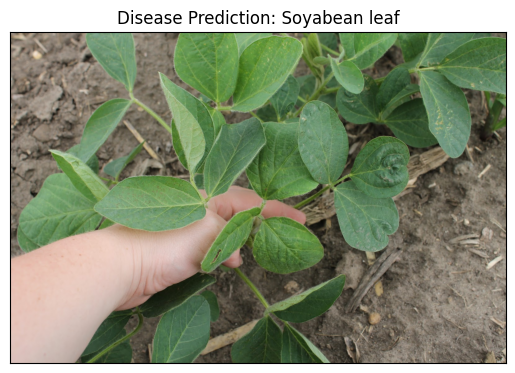

In [132]:
# Displaying result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Prediction: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()